<a href="https://colab.research.google.com/github/southjohn64/data_mine/blob/main/Copy_of_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install turicreate

In [60]:
import json
import os
import networkx as nx
import turicreate as tc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!mkdir ./datasets/
!rm -rf ./datasets/reddit/

In [ ]:
!mkdir ./datasets/reddit
!wget http://dynamics.cs.washington.edu/nobackup/reddit/Dexter.tar.gz -O ./datasets/reddit/Dexter.tar.gz
#!unzip ./datasets/reddit/*.gz  -d ./datasets/reddit/
!tar -xf "/content/datasets/reddit/Dexter.tar.gz" -C "./datasets/reddit/"
!ls ./datasets/reddit/

In [51]:
sg = tc.load_sgraph('/content/datasets/reddit/Dexter.2009-10-23.2009-11-20.sgraph')
sg

SGraph({'num_edges': 16, 'num_vertices': 8})
Vertex Fields:['__id', 'mindate', 'maxdate']
Edge Fields:['__src_id', '__dst_id', 'maxdate', 'weight', 'mindate']

# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [4]:
from turicreate import degree_counting
deg = degree_counting.create(sg)
deg_graph = deg['graph'] # a new SGraph with degree data attached to each vertex
in_degree = deg_graph.vertices[['__id', 'in_degree']]
out_degree = deg_graph.vertices[['__id', 'out_degree']]
deg_graph.vertices[['__id', 'total_degree']]

__id,total_degree
ContentWithOurDecay,8
chroniq,6
aenea,4
Bbaily,6
DoeL,2
Surcam,2
chime,2
apmihal,2


In [5]:
graph_deg_df = deg_graph.vertices[['__id', 'total_degree']].to_dataframe()


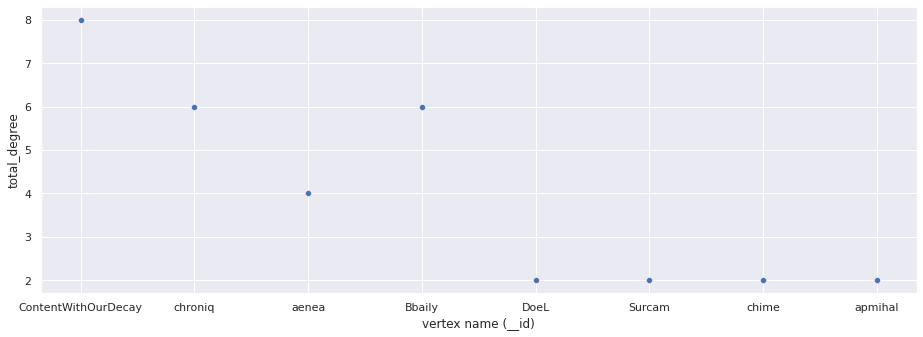

In [18]:
sns.set(rc={'figure.figsize':(15.7,5.27)})

ax = sns.scatterplot(data=graph_deg_df , x="__id", y="total_degree")
ax.set(xlabel='vertex name (__id)');

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [7]:
pr = tc.pagerank.create(sg)
sg.vertices['pagerank'] = pr['graph'].vertices['pagerank'] #pr['graph'] is a graph in which each vertex has pagerank value
sg.vertices
sg.vertices.sort("pagerank", ascending=False)[:40]


Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 5.24167               |

| 2         | 3.13083               |

| 3         | 2.25606               |

| 4         | 1.72552               |

| 5         | 1.40263               |

| 6         | 1.17117               |

| 7         | 0.985853              |

| 8         | 0.834804              |

| 9         | 0.708132              |

| 10        | 0.601435              |

| 11        | 0.511002              |

| 12        | 0.434279              |

| 13        | 0.369105              |

| 14        | 0.313728              |

| 15        | 0.266664              |

| 16        | 0.226663              |

| 17        | 0.192663              |

| 18        | 0.163763              |

| 19        | 0.139198              |

| 20        | 0.118319              |

+-----------+-----------------------+

__id,mindate,maxdate,pagerank
chroniq,2009-10-23 05:56:41,2013-09-23 16:09:20,2.565090740523448
aenea,2009-10-23 10:43:06,2011-01-31 13:34:33,2.4913315301242274
ContentWithOurDecay,2009-10-23 06:26:33,2015-03-01 17:30:59,0.38014102452563364
Bbaily,2009-10-23 16:27:38,2013-06-13 21:28:03,0.26760331552902794
DoeL,2009-10-23 12:26:49,2009-10-23 12:26:49,0.2607190204341546
chime,2009-11-12 00:56:01,2012-11-21 05:54:21,0.2038533155290279
apmihal,2009-10-24 01:19:37,2010-07-23 04:42:27,0.2038533155290279
Surcam,2009-10-27 14:28:49,2009-10-27 14:43:13,0.15


In [8]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(sg)
print("Networkx: %s" % nx.info(ng))

Networkx: DiGraph with 8 nodes and 16 edges


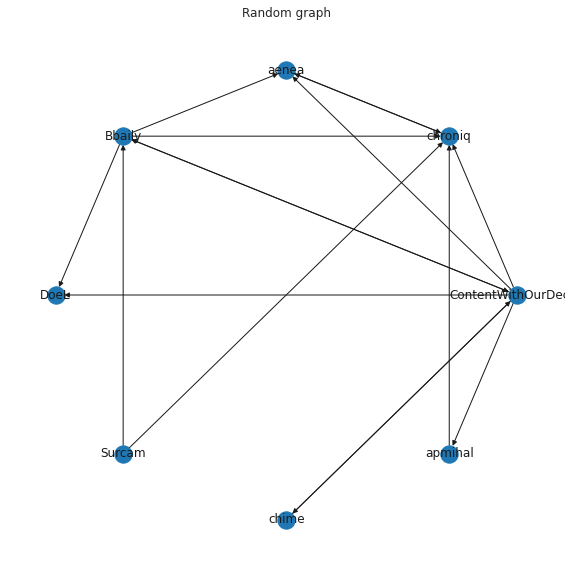

In [30]:
def get_top_40_users_by_selected_centrality(algo_name, network_graph):
  if algo_name =='page_rank':
    do_page_rank(network_graph)
  if algo_name == 'closeness_centrality':
    do_closeness_centrality(network_graph)

get_top_40_users_by_selected_centrality('page_rank', ng)


    

**page rank**

In [29]:
def do_page_rank(ng):
  #d = nx.pagerank(ng)

  top40_pagerank =  sorted(nx.pagerank(ng) ,key=len, reverse=True)[:40]
  #[len(c) for c in top40_pagerank][:40]
  h = ng.subgraph(top40_pagerank)
  plt.figure(figsize=(10,10))
  ax = plt.gca()
  ax.set_title('page rank')
  nx.draw_circular(h, with_labels=True)

**closeness_centrality**

In [31]:
def do_closeness_centrality(ng):
  #d = nx.closeness_centrality(ng) # can take some time to run
  top40_closeness_centrality =  sorted(nx.closeness_centrality(ng) ,key=len, reverse=True)[:40]
  #[len(c) for c in top40_closeness_centrality][:40]
  h = ng.subgraph(top40_closeness_centrality)
  plt.figure(figsize=(10,10))
  ax = plt.gca()
  ax.set_title('closeness centrality')
  nx.draw_circular(h, with_labels=True)


**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [37]:
dict(sorted(nx.pagerank(ng).items(), key=lambda item: item[1]))

{'Bbaily': 0.06206216197944935,
 'ContentWithOurDecay': 0.0828947633011499,
 'DoeL': 0.033988252927105625,
 'Surcam': 0.022361251873504986,
 'aenea': 0.36057615050300873,
 'apmihal': 0.027394148216789108,
 'chime': 0.03242704456007323,
 'chroniq': 0.3782962266389188}

In [52]:
triangle_counting_sg = tc.triangle_counting.create(sg)
#triangle_counting_sg_out = triangle_counting_sg['triangle_count']
sg.vertices['triangle_count'] = triangle_counting_sg['graph'].vertices['triangle_count']
sg.vertices.sort('triangle_count',ascending=False)

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.083595 secs.

Total triangles in the graph : 7

__id,mindate,maxdate,triangle_count
ContentWithOurDecay,2009-10-23 06:26:33,2015-03-01 17:30:59,5
chroniq,2009-10-23 05:56:41,2013-09-23 16:09:20,5
Bbaily,2009-10-23 16:27:38,2013-06-13 21:28:03,5
aenea,2009-10-23 10:43:06,2011-01-31 13:34:33,3
DoeL,2009-10-23 12:26:49,2009-10-23 12:26:49,1
Surcam,2009-10-27 14:28:49,2009-10-27 14:43:13,1
apmihal,2009-10-24 01:19:37,2010-07-23 04:42:27,1
chime,2009-11-12 00:56:01,2012-11-21 05:54:21,0


**avg shortest path**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


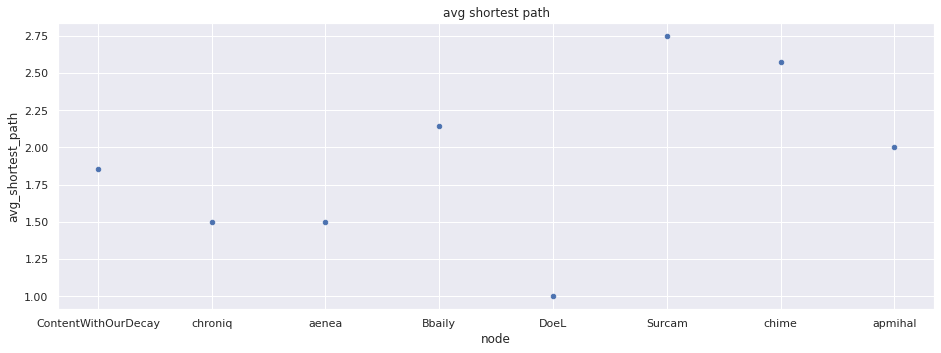

In [72]:
shortest_path_avg_dic = {}
shortest_path_dic = nx.shortest_path(ng)

shortest_path_avg_dic = {}
shortest_path_avg_dic['node'] = []
shortest_path_avg_dic['avg_shortest_path'] = []
for key, value in shortest_path_dic.items():
  vertex_dic = shortest_path_dic[key]
  num_items = len(vertex_dic)
  total_path_lenth = 0.0
  for _, vertex_array in vertex_dic.items():
    total_path_lenth += len(vertex_array)
  avg = total_path_lenth / num_items
  shortest_path_avg_dic['node'].append(key)
  shortest_path_avg_dic['avg_shortest_path'].append(avg)
shortest_path_avg_dic
pd.DataFrame(shortest_path_avg_dic).plot(kind='scatter', x='node', y='avg_shortest_path',title='avg shortest path');


In [83]:
nx

<module 'networkx' from '/usr/local/lib/python3.7/dist-packages/networkx/__init__.py'>

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [86]:
dexter_graph = nx.Graph()
#l = [g1,g2,g3]
nodes = set()
edges = set()
#for g in l:
nodes |= ng.nodes()
edges |= ng.edges()

dexter_graph.add_nodes_from(nodes)
dexter_graph.add_edges_from(edges)

#let's add weights
for e in dexter_graph.edges():
    dexter_graph[e[0]][e[1]]['weight'] = 0

#for g in l:
for e in ng.edges():
    dexter_graph[e[0]][e[1]]['weight'] += ng[e[0]][e[1]]['weight']
        
print(nx.info(dexter_graph))
    

Graph with 8 nodes and 13 edges


In [87]:
nx.write_gexf(dexter_graph, "./datasets/dexter.gexf")
nx.write_gml(dexter_graph, "./datasets/dexter.gml")

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges